# Seção 02 - API Básica e RNA
### Aluno: Vinícius Trainotti

# Câncer de Mama - Rede Neurais Básico

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape
data.target
data.target_names
data.feature_names
data.target.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential( [ tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid') ] )
#or
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,),
#activation='sigmoid'))
#or
#i = tf.keras.layers.Input(shape=(D,))
#x = tf.keras.layers.Dense(1, activation="sigmoid")(i)
#model = tf.keras.models.Model(i, x)


In [ ]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.7301 - accuracy: 0.5276 - val_loss: 0.7054 - val_accuracy: 0.5532
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.5906 - val_loss: 0.6326 - val_accuracy: 0.6223
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.6850 - val_loss: 0.5715 - val_accuracy: 0.6968
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7638 - val_loss: 0.5206 - val_accuracy: 0.7766
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4828 - accuracy: 0.8189 - val_loss: 0.4786 - val_accuracy: 0.7979
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4448 - accuracy: 0.8478 - val_loss: 0.4434 - val_accuracy: 0.8564
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8635 - val_loss: 0.4140 - val_accuracy: 0.8670
Epoch 8/100


In [ ]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9764
Train score:  [0.10103047639131546, 0.9763779640197754]
6/6 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9787
Test score:  [0.09860039502382278, 0.978723406791687]


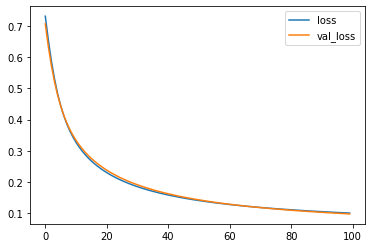

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

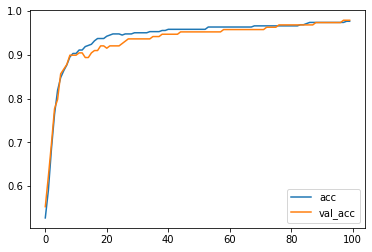

In [ ]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
pred = model.predict(X_test)
print(pred)

6/6 [==============================] - 0s 2ms/step
[[1.48561805e-01]
 [4.93474662e-01]
 [9.37464368e-03]
 [1.71106134e-03]
 [9.67676818e-01]
 [1.33461681e-05]
 [4.36438859e-01]
 [4.63386551e-02]
 [6.51765168e-01]
 [7.63454616e-01]
 [9.86868739e-01]
 [9.42439556e-01]
 [9.02763307e-01]
 [9.98710215e-01]
 [3.53934348e-01]
 [1.46368198e-04]
 [9.93362784e-01]
 [1.11833364e-01]
 [9.89362299e-01]
 [9.90475655e-01]
 [1.48455834e-03]
 [9.91526961e-01]
 [9.90715206e-01]
 [9.70857441e-01]
 [1.09878182e-02]
 [9.89853978e-01]
 [9.86125112e-01]
 [7.15753675e-01]
 [1.50183826e-06]
 [6.38559520e-01]
 [1.03334367e-01]
 [1.77419352e-04]
 [4.29225806e-03]
 [1.42136450e-05]
 [6.22768164e-01]
 [1.43666042e-03]
 [3.49996611e-02]
 [9.64291930e-01]
 [1.78384711e-04]
 [9.97822523e-01]
 [3.06931301e-03]
 [9.06960011e-01]
 [9.77432609e-01]
 [9.97914851e-01]
 [8.96000326e-01]
 [4.54635965e-03]
 [5.40969551e-01]
 [7.02824182e-05]
 [9.85351652e-02]
 [9.83191967e-01]
 [9.93912995e-01]
 [9.91129935e-01]
 [1.05864217e

In [ ]:
import numpy as np
# flatten: transformar em vetor, pois está em matriz (N,1)
pred = np.round(pred).flatten()
print(pred)

[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.]


In [ ]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])

Acurácia na mão:  0.9787234042553191
6/6 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9787
Evaluate:  [0.09860039502382278, 0.978723406791687]

6/6 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9787
Acurácia:  0.978723406791687


(<Figure size 504x504 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

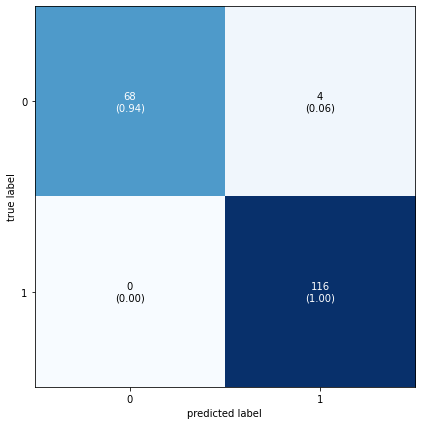

In [ ]:
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

# MNIST - Reconhecimento de dígitos

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(i, x)

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
r = model.fit(x_train,
y_train,
validation_data=(x_test, y_test),
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3018 - accuracy: 0.9127 - val_loss: 0.1441 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1460 - accuracy: 0.9574 - val_loss: 0.1019 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1130 - accuracy: 0.9657 - val_loss: 0.0871 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.0823 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0772 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9802 - val_loss: 0.0744 - val_accurac

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9784
[0.07645390182733536, 0.9783999919891357]


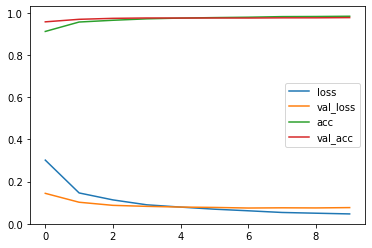

In [ ]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 1s 2ms/step


(<Figure size 504x504 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

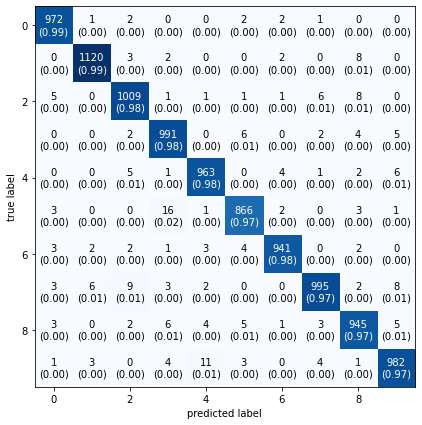

In [ ]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

Text(0.5, 1.0, 'True label: 7 Predicted: 0')

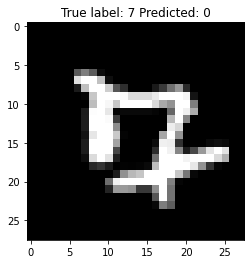

In [ ]:
# mostrar algumas classificações erradas
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

# Biomassa: Predição de Biomassa

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
tf.__version__

'2.11.0'

In [ ]:
!wget http://www.razer.net.br/datasets/Biomassa_REG.csv
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=
",").values
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

--2023-03-25 16:29:24--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv’

Biomassa_REG.csv    100%[===================>]  81.04K  --.-KB/s    in 0.1s    

2023-03-25 16:29:25 (678 KB/s) - ‘Biomassa_REG.csv’ saved [82988/82988]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
dap_train = x_train[:,0]
h_train = x_train[:,1]
dap_test = x_test[:,0]
h_test = x_test[:,1]

In [ ]:
i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

In [ ]:
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )
def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,
loss="mse",
metrics=[rmse, r2])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
r = model.fit(x_train, y_train,
epochs=1500,
validation_data=(x_test, y_test),
callbacks=[early_stop])

Epoch 1/1500
84/84 [==============================] - 2s 6ms/step - loss: 12715449.0000 - rmse: 1311.9037 - r2: -0.1628 - val_loss: 6278316.5000 - val_rmse: 1348.0071 - val_r2: -0.1562
Epoch 2/1500
84/84 [==============================] - 0s 3ms/step - loss: 9215533.0000 - rmse: 1480.8468 - r2: -0.2839 - val_loss: 5247612.5000 - val_rmse: 995.0413 - val_r2: 0.2841
Epoch 3/1500
84/84 [==============================] - 0s 3ms/step - loss: 8006705.0000 - rmse: 1122.2935 - r2: -0.6900 - val_loss: 4101123.7500 - val_rmse: 1079.2715 - val_r2: -0.1131
Epoch 4/1500
84/84 [==============================] - 0s 4ms/step - loss: 7377144.0000 - rmse: 1038.5579 - r2: 0.0529 - val_loss: 3973066.2500 - val_rmse: 682.5215 - val_r2: 0.4792
Epoch 5/1500
84/84 [==============================] - 0s 3ms/step - loss: 6815592.0000 - rmse: 881.0782 - r2: -0.0866 - val_loss: 3587942.2500 - val_rmse: 684.8145 - val_r2: 0.4185
Epoch 6/1500
84/84 [==============================] - 0s 3ms/step - loss: 6502953.0000 

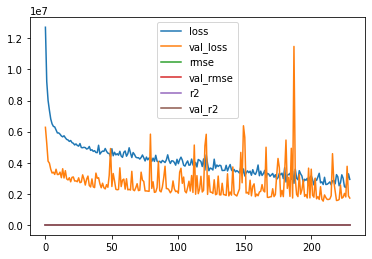

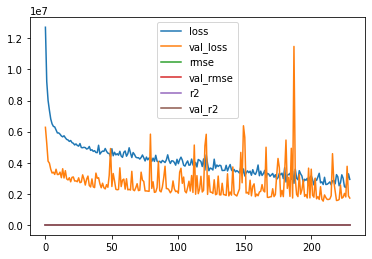

In [ ]:
plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()
plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

In [ ]:
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

42/42 [==============================] - 0s 2ms/step
mse =  1531049.505951966
rmse =  1237.3558525953501
r2 =  0.8836483729775872


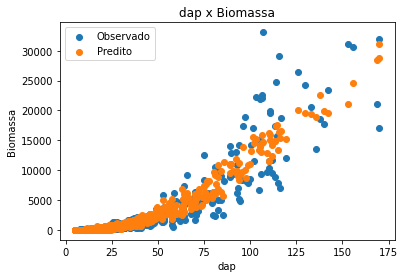

In [ ]:
plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()